# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [2]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading and viewing the data

data = pd.read_csv('product_sales.csv')
print(data.head())

   week  sales_method  ... nb_site_visits      state
0     2         Email  ...             24    Arizona
1     6  Email + Call  ...             28     Kansas
2     5          Call  ...             26  Wisconsin
3     4         Email  ...             25    Indiana
4     3         Email  ...             28   Illinois

[5 rows x 8 columns]


# Data Cleaning and Validation

The data provided for analysis, '**Product Sales**' contains 8 columns and 15000 rows. 

- The **Week** column contains integers values (1-6) representing week since a product is launched.
- **sales_method** represents the methods used for the customer acquisition. As per description, 3 methods: **Email**, **Call** and **Email + Call**, were used for customers. In the dataset, 5 unique values were observed including these three and **email** and **em + call**. These two values needed to be corrected and changes made accordingly.
- **customer_id** is unique identifier for each customer.
- **nb_sold** and **nb_site_visits** are numeric columns with no missing or redundant values.
- **year_as_customer** shows the year customer have been buying from the company. Given the company founded in 1984, any values greater than 40 in this column should be replaced. There were two values identified and replaced by 40.
- **state** shows the location where the products are delivered.
- **revenue** represents sales revenue which contains 1074 missing values, which is around 7% of the total number of rows. These missing values are imputed by the median revenue for each sales method. 

In [158]:
print("Shape of the data:")
data.shape

Shape of the data:


(15000, 8)

In [4]:
print("Observing data types:")
print(data.dtypes)

Observing data types:
week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object


In [6]:
# Check for missing values
print("Summarizing missing values in the data:")
print(data.isnull().sum())

Summarizing missing values in the data:
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [17]:
# Unique values
print('Count of unique values:')
print(data.nunique())

print('Unique values in sales method column:')
print(data['sales_method'].unique())
print('Years as customer more than 40:')
print(data['years_as_customer'][data['years_as_customer'] > 40])


Count of unique values:
week                     6
sales_method             3
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       41
nb_site_visits          27
state                   50
dtype: int64
Unique values in sales method column:
['Email' 'Email + Call' 'Call']
Years as customer more than 40:
Series([], Name: years_as_customer, dtype: int64)


In [14]:
# Handling invalid data
data.loc[data['years_as_customer'] > 40, 'years_as_customer'] = 40


In [163]:
# Missing value imputation
def stratified_imputation(group):
    # Calculate median of 'revenue' within each group
    median_revenue = group['revenue'].median()
    # Impute missing values with the median within each group
    group['revenue'] = group['revenue'].fillna(median_revenue)
    
    return group

# Group the DataFrame by 'sales_method' and apply stratified imputation
data = data.groupby('sales_method').apply(stratified_imputation)

# Check if there are still any missing values in 'revenue' column
missing_values = data['revenue'].isnull().sum()

print("Number of missing values after imputation:", missing_values)


Number of missing values after imputation: 0


In [15]:
# Data Cleaning: in sales_method Column
data['sales_method'] = data['sales_method'].replace({
    'email' : 'Email',
    'em + call' : 'Email + Call'
})

In [168]:
print('Glimpse of the cleaned data')
data.info()

data.head()

Glimpse of the cleaned data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,95.58,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,95.58,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# Data Exploration

From the distribution of site visits, we observe that we get around 25 site visits. The number varies within the range from 12 to 41.

From the boxplot to show the distribution of revenue, it shows the revenue is often concentrated between 50 to 100 units of currency, with the median value closer to 100. The higher values occur less frequently.

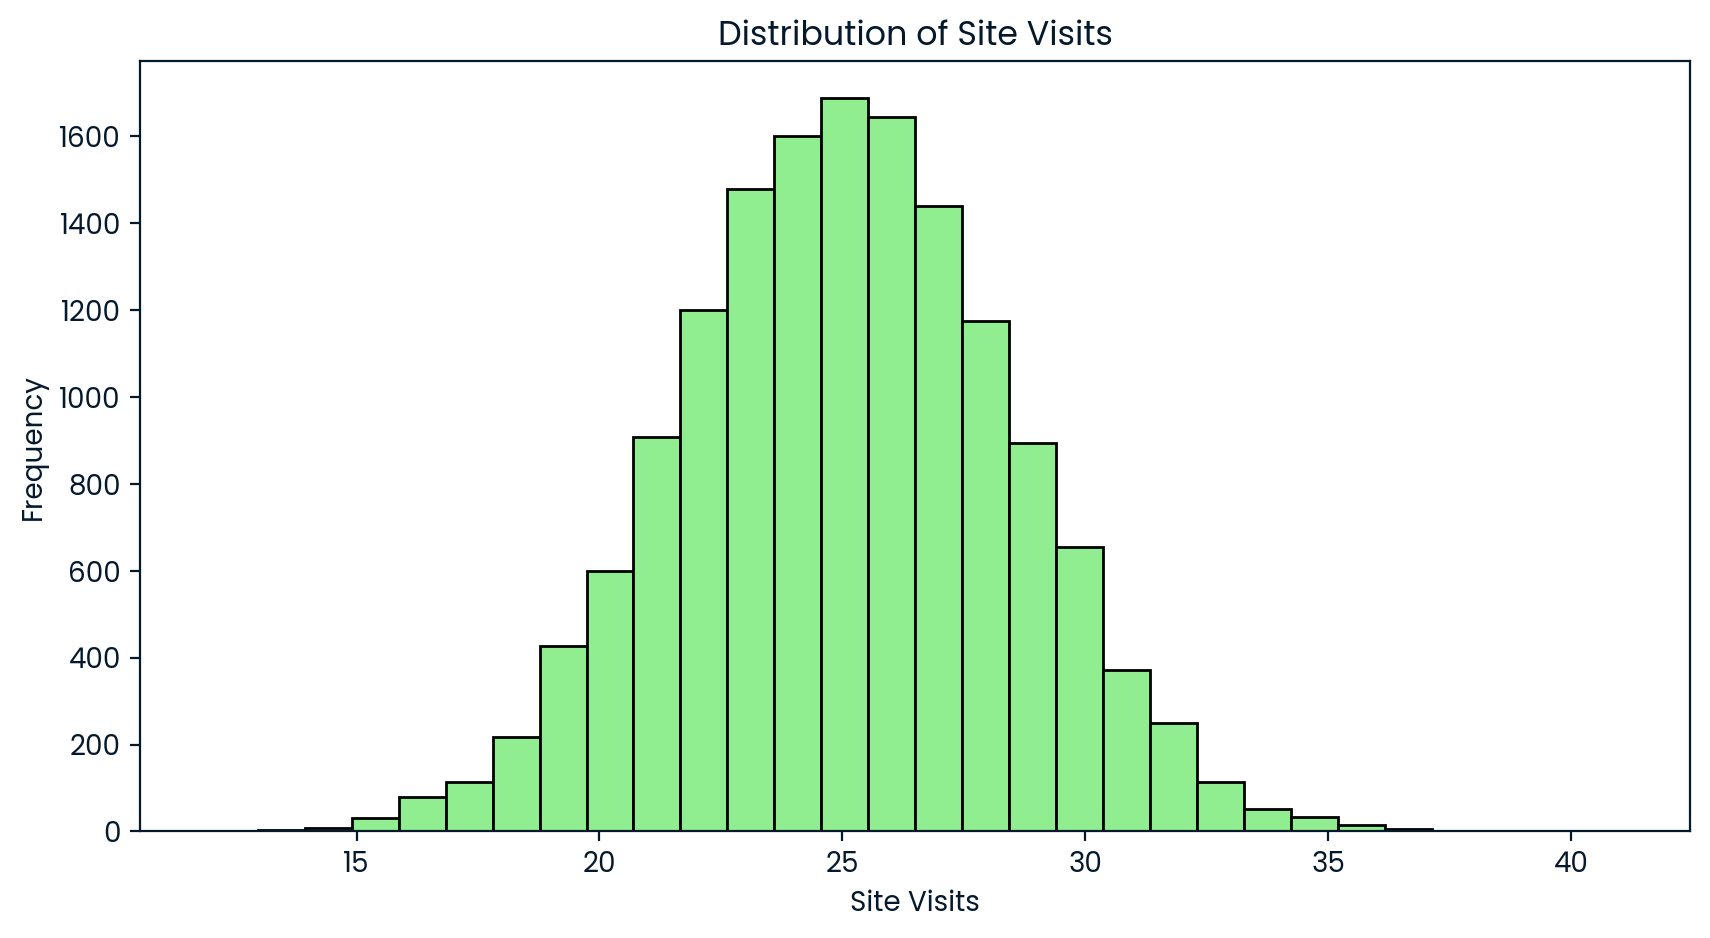

In [43]:
plt.figure(figsize = (10, 5))
plt.hist(data['nb_site_visits'], bins = 30, color = 'lightgreen', edgecolor = 'black')
plt.title('Distribution of Site Visits')
plt.xlabel('Site Visits')
plt.ylabel('Frequency')
plt.show()

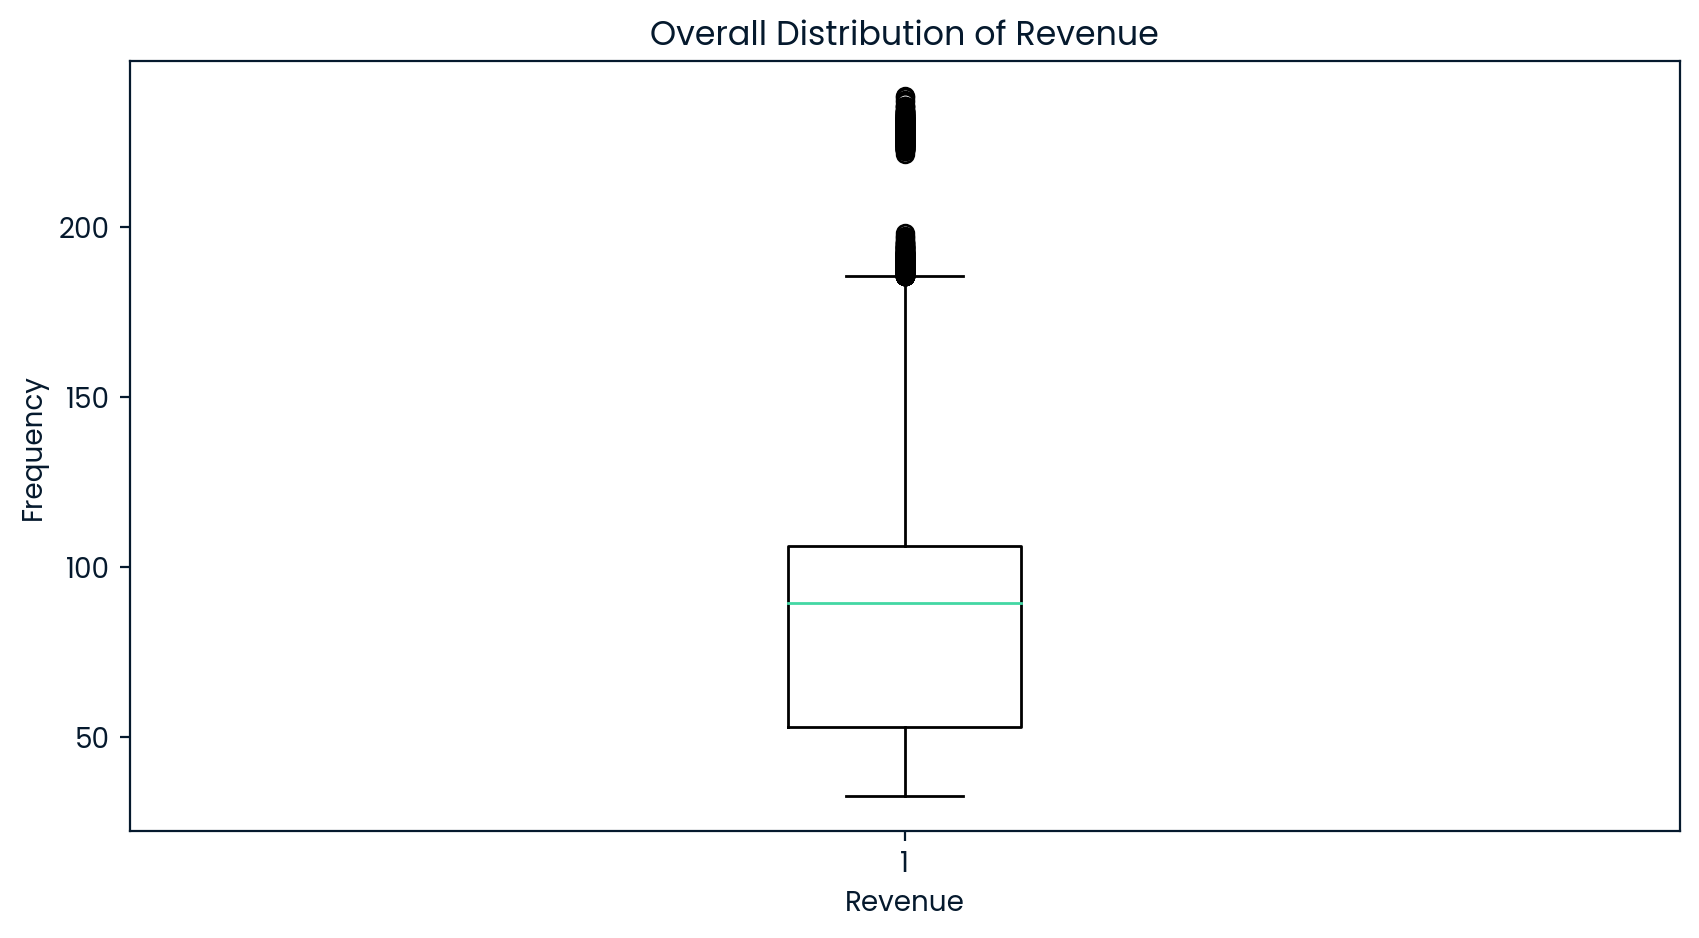

In [45]:
plt.figure(figsize = (10,5))
plt.boxplot(data['revenue'])
plt.title('Overall Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

These pie charts shows some important insights on the sales method. The mostly used sales method is Email, given that, highest number of customers are acquired by this method, which is around 50% of the total customer. 17% of total customer are acquired by Email + Call method and rest by only Call.

Though the method **Email + Call** is the less used method, it shared 31.3% of the total revenue generated. 51.3% of total revenue came from **Email** sales and rest came from phone calls.

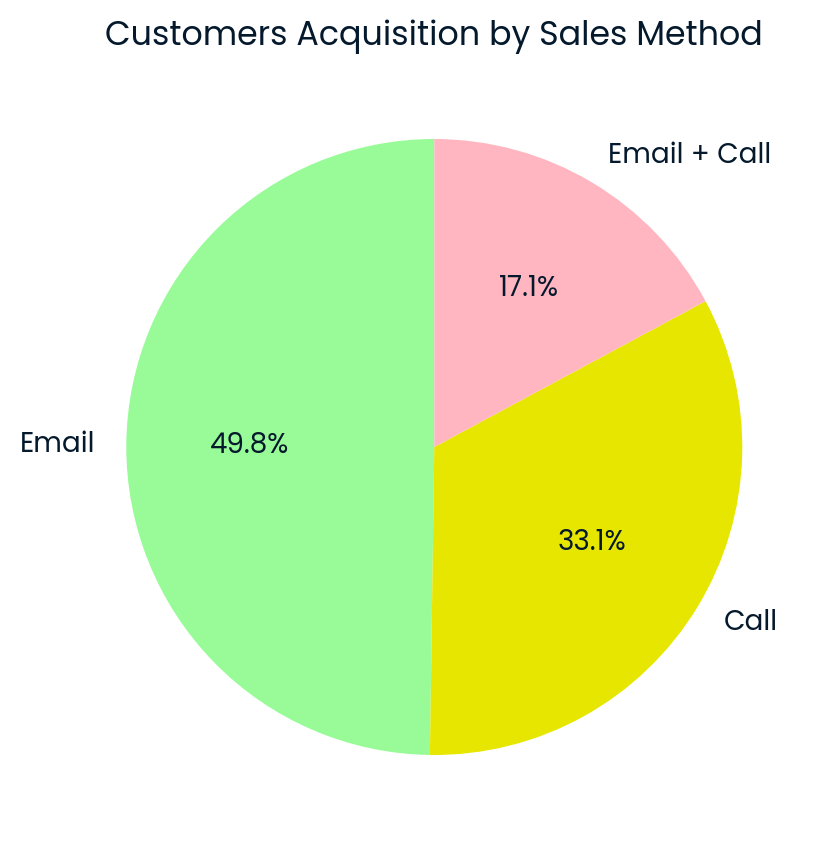

In [66]:
values = data['sales_method'].value_counts()
colors = values.rank(ascending=False).map({
    1: '#98FB98', 
    2: '#E6E600', 
    3: '#FFB6C1'   
})
plt.figure(figsize = (10, 5))
plt.pie(values, labels = values.index, autopct = '%1.1f%%', startangle = 90, colors = colors)
plt.title('Customers Acquisition by Sales Method')
plt.show()




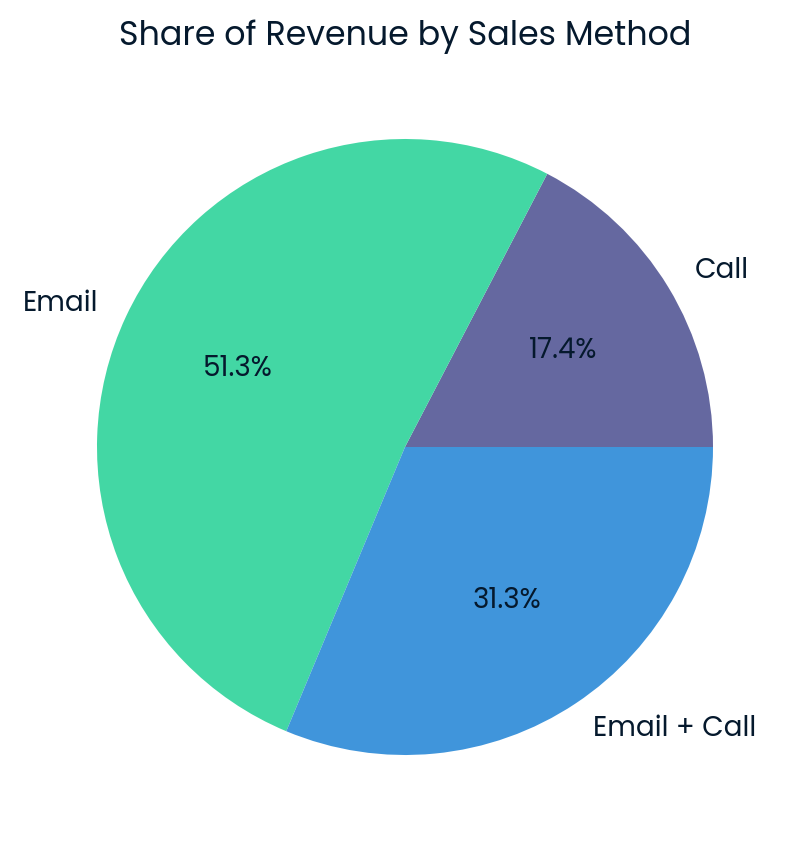

In [92]:
#  Rev % by sales method

rev_pct = ((data.groupby('sales_method')['revenue'].sum())/data['revenue'].sum())*100

plt.figure(figsize = (10, 5))
plt.pie(rev_pct, labels = rev_pct.index, autopct = '%1.1f%%')
plt.title('Share of Revenue by Sales Method')
plt.show()

To analyze the effectiveness of sales method, the following graphs are generated.

The median revenue generate by sending Emails to the customer is higher than using Calls only. But the revenue goes much higher combining Emails and Calls. The reason behind this could be: When customer gets a call about a product, it is more likely that customer does not show interest to learn more about the product as the customer could be busy or not interested at all. But when customers receive Email about a product and feels interested, then reaching out to them via follow-up Calls get them more interested to know more about the product. This process increases the chance of buying the product by the customers.

Again, number of items sold increases by week since products are launched by acquiring the **Email + Call** method.

sales_method
Email           721005.83
Email + Call    439492.19
Call            243762.99
Name: revenue, dtype: float64


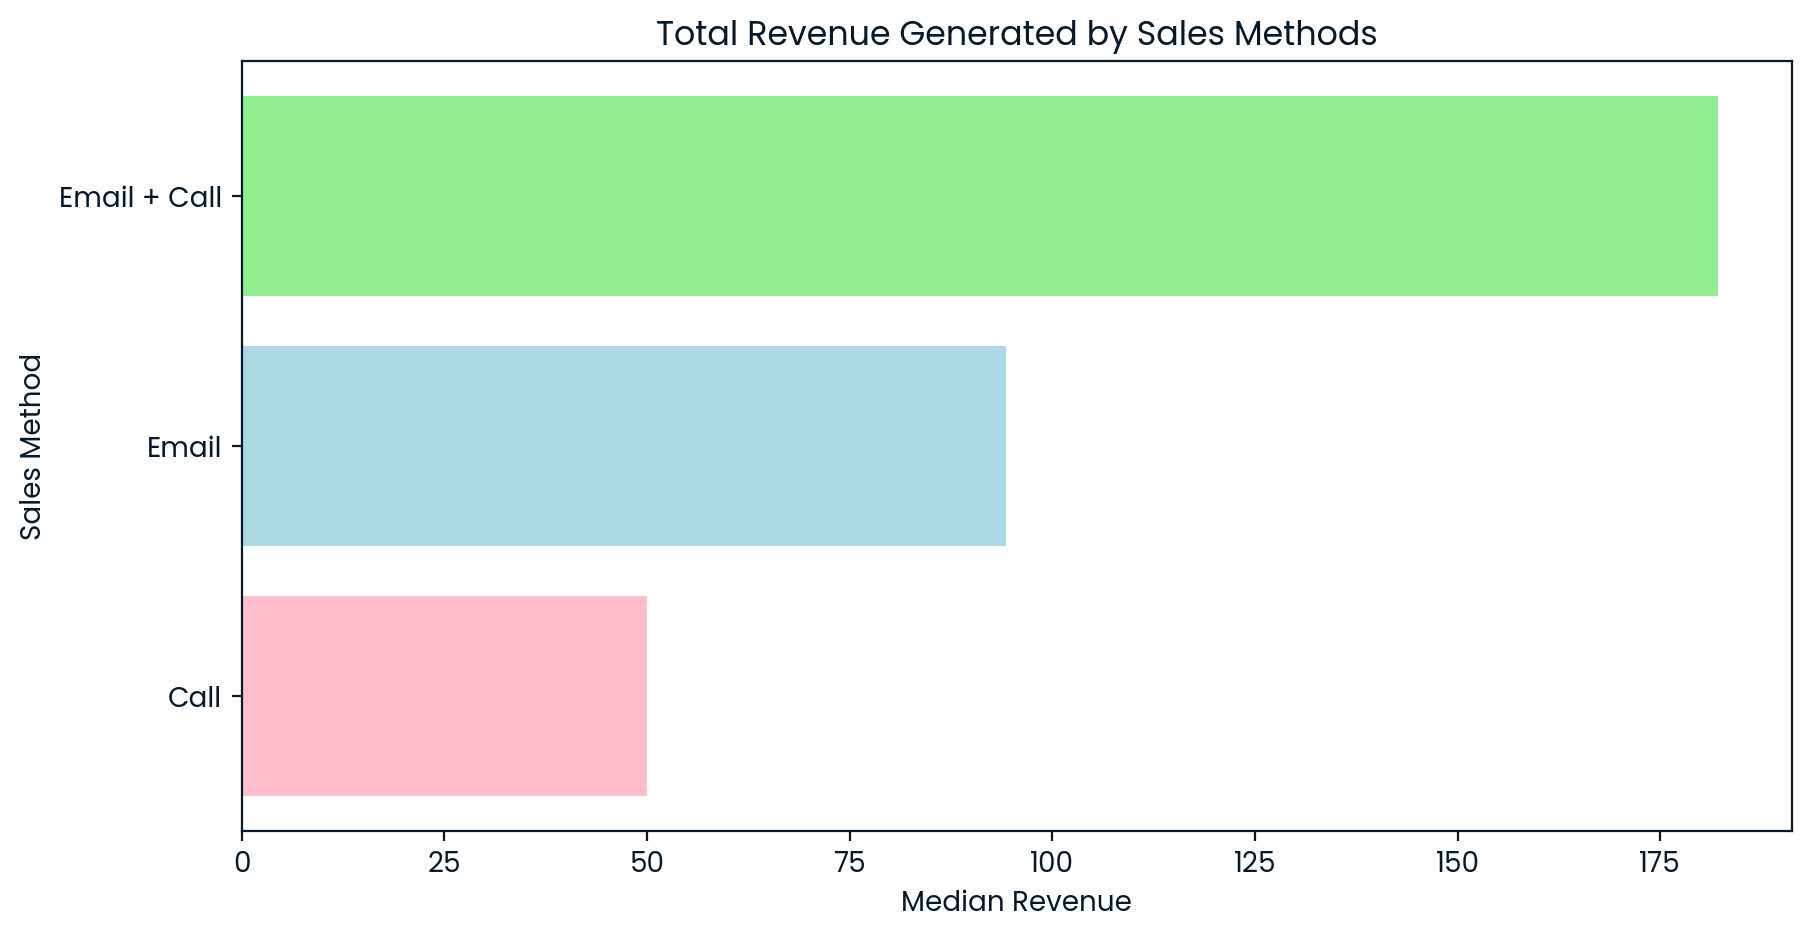

In [96]:
# Revenue by Sales Method
print(data.groupby('sales_method')['revenue'].sum().sort_values(ascending = False))

rev = data.groupby('sales_method')['revenue'].median().sort_values(ascending = True)

plt.figure(figsize = (10, 5))
plt.barh(rev.index, rev, color = ['pink', 'lightblue', 'lightgreen'])
plt.title('Total Revenue Generated by Sales Methods')
plt.xlabel('Median Revenue')
plt.ylabel('Sales Method')
plt.show()

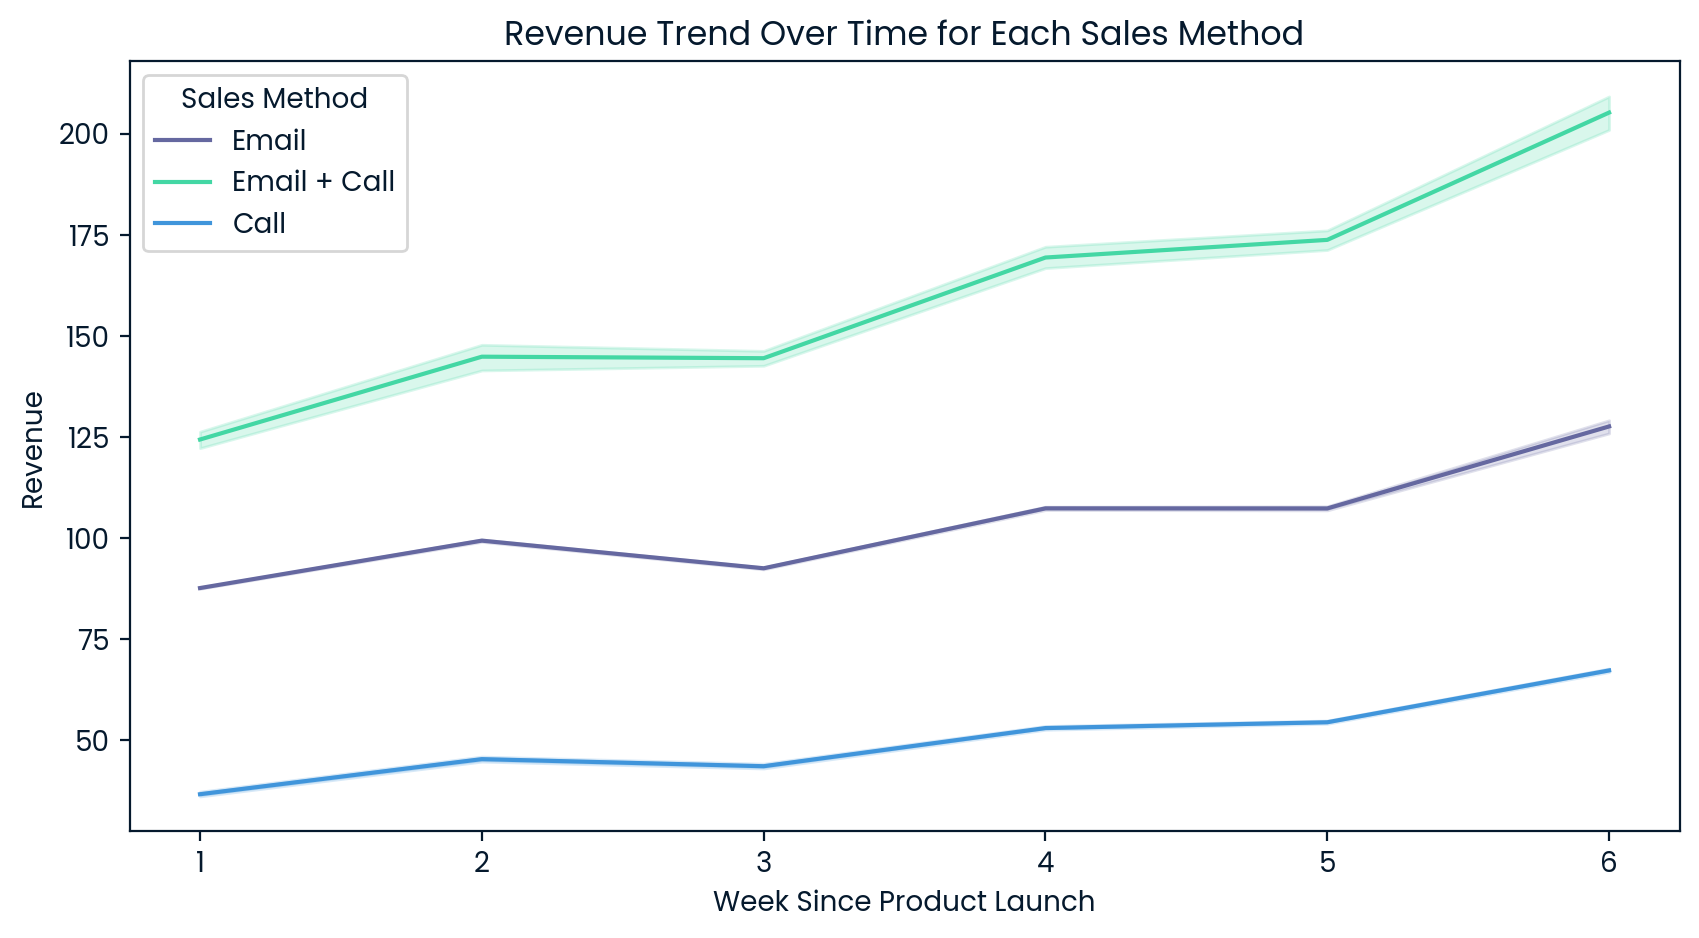

In [97]:
# To analyze the difference in revenue over time for each sales method, we can create line plots showing the trend of revenue over the weeks since the product launch
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x='week',y = 'revenue', hue ='sales_method')
plt.title('Revenue Trend Over Time for Each Sales Method')
plt.xlabel('Week Since Product Launch')
plt.ylabel('Revenue')
plt.legend(title='Sales Method')
plt.show()

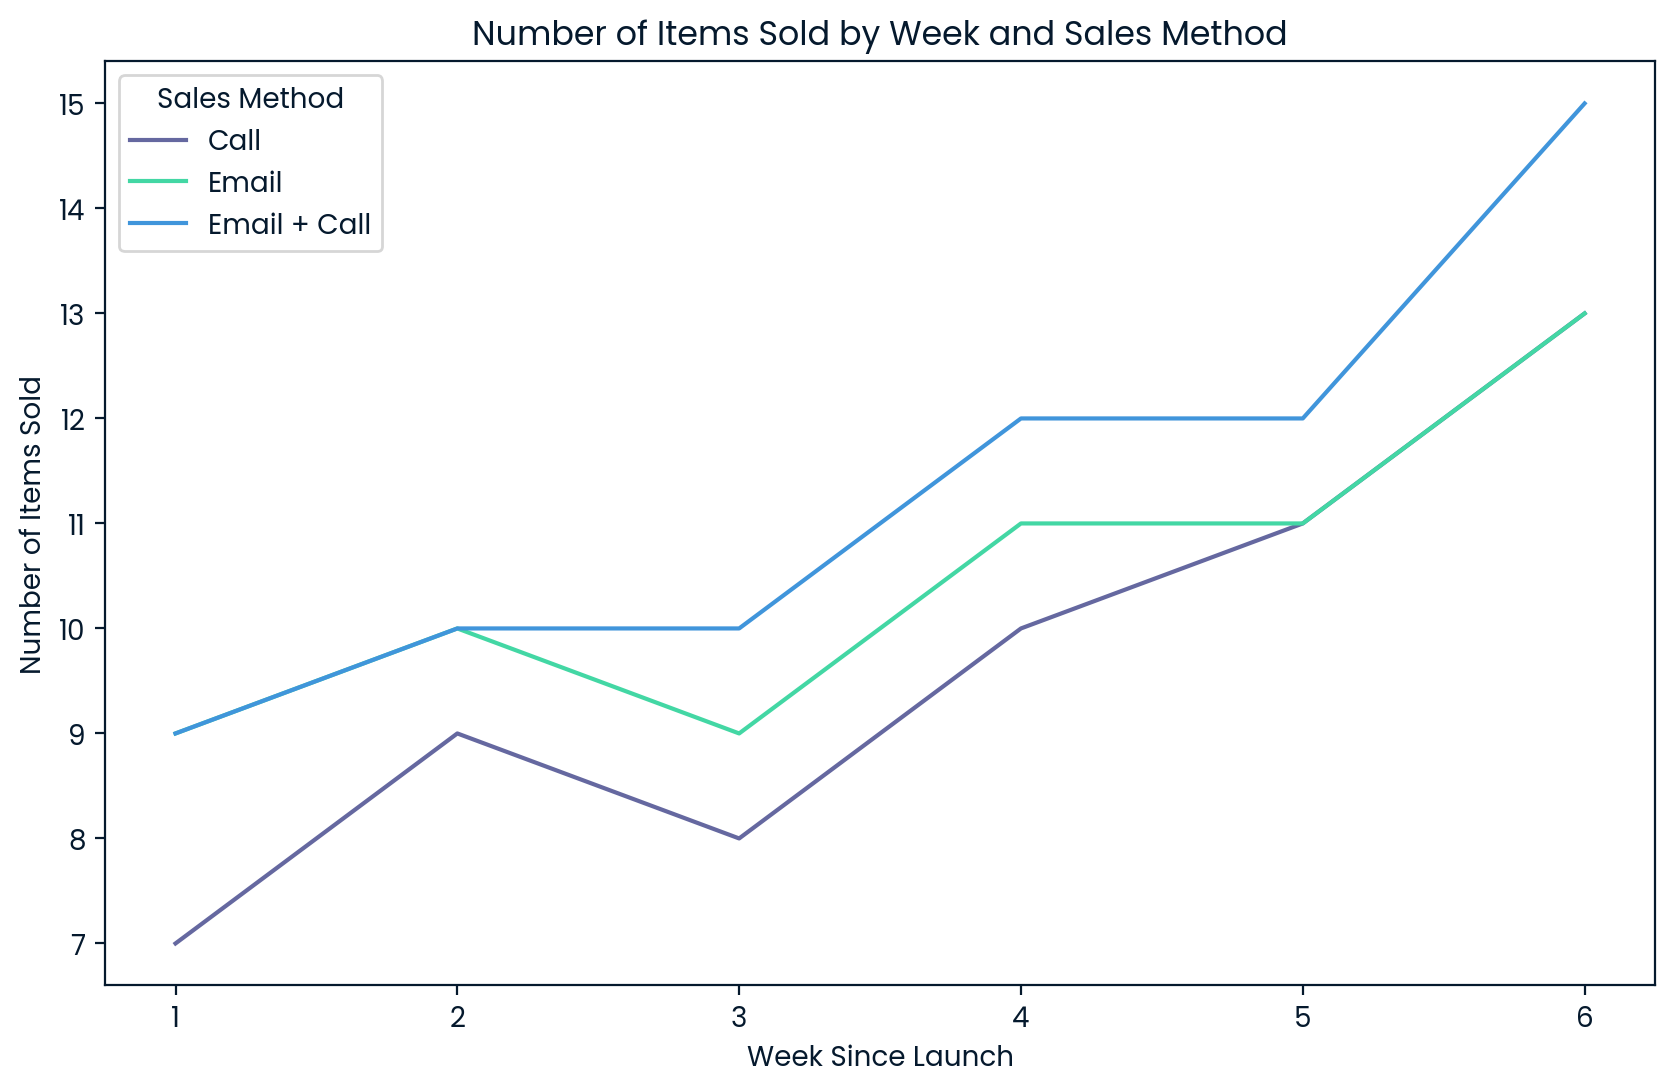

In [104]:
# Group by week and sales_method, then sum the number of items sold
sales_by_week = data.groupby(['week', 'sales_method'])['nb_sold'].median().reset_index()

# Plotting the line plot
plt.figure(figsize=(10, 6))
for method in sales_by_week['sales_method'].unique():
    subset = sales_by_week[sales_by_week['sales_method'] == method]
    plt.plot(subset['week'], subset['nb_sold'], label=method)

plt.title('Number of Items Sold by Week and Sales Method')
plt.xlabel('Week Since Launch')
plt.ylabel('Number of Items Sold')
plt.legend(title='Sales Method')
plt.grid(False)
plt.show()


# Define Metric

We are selling our products in three methods: **Email**, **Call**, and **Email + Call**. We are getting site visits for each method and generating revenue. Therefore, to examine the performance of these methods, we set the metric: **Average Revenue per Visit(ARPV)**.

The formula for this calculation: $$ARPV = \frac{Total Revenue}{Total Visits}$$

To analyze this metric (Average Revenue per Visits by Sales Method, ARPVM) for each sales method, the formula will be:

$$ARPVM = \frac{TotalRevenue(bySalesMethod)}{TotalVisits(bySalesMethod)}$$

From the calculations have been done, the initial value shoes the average revenue is 3.74 units of currency per visit regardless the sales method.

We observe highest ARPVM for **Email + Call** meaning that it has been the most effective sales method.

In [106]:
revenue = data['revenue'].sum()
visits = data['nb_site_visits'].sum()
print('Average Revenue per Visits:')
print(revenue/visits)

Average Revenue per Visits:
3.7460645889298223


In [110]:
rev_method = data.groupby('sales_method')['revenue'].sum()
visits_method = data.groupby('sales_method')['nb_site_visits'].sum()
print('Initial Average Revenue per Visit by Sales Method:')
print(rev_method/visits_method)

Initial Average Revenue per Visit by Sales Method:
sales_method
Call            2.011395
Email           3.901209
Email + Call    6.382773
dtype: float64


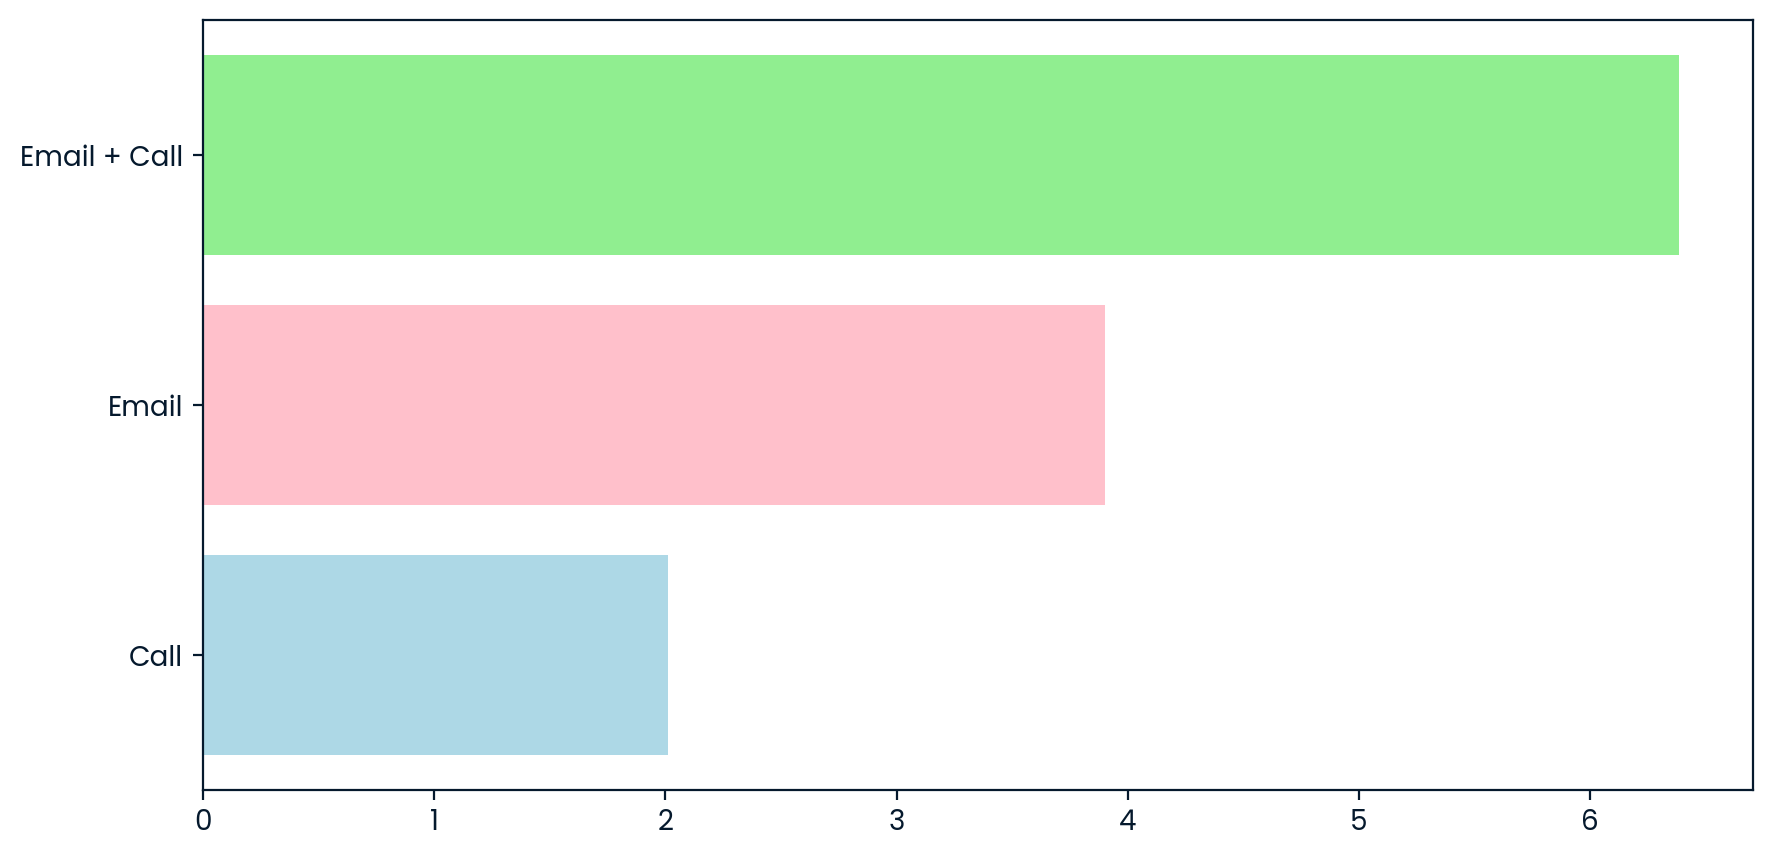

In [123]:
init = rev_method / visits_method
plt.figure(figsize = (10, 5))
plt.barh(init.index, init, color = ['lightblue', 'pink', 'lightgreen'])
plt.show()

# Conclusions

- Based on the findings, **Email + Call** is the most effective sales method.
- Revenue generated with **Email + Call** is 31% whereas only 17% of the customers were reached by this method. Maximizing the usage of this method will generate more revenue for the company.
- With more data, further analysis on churn rate, return on investment, customer acquisition cost, average order value - these kind of metrics can be analyzed.